# seaborn 入門
---

+ seabornとは、Pythonのデータ可視化ライブラリ
+ matplotlib（同じPythonの可視化ライブラリ）が内部で動いていいる

*seabornの長所*
+  洗練された図を描くことができる
+  matplotlibと比べて少ないコードで図が描ける

*seabornの短所*
+ matplotlibよりユーザーが少ない

cf.[seaborn 徹底入門！Pythonを使って手軽で綺麗なデータ可視化８連発](https://www.codexa.net/seaborn-python/)

In [1]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [2]:
!pip install seaborn

     |████████████████████████████████| 283 kB 687 kB/s eta 0:00:01


## e.g. matplotlib　vs　seaborn
tips(サンプルのデータセット)を元に、```violinplot（ヴァイオリンプロット）```と呼ばれるグラフを描画。
このtipsデータセットは、あるレストランにおいて店員が受け取ったチップと、
その客の支払い金額や性別、食事をした曜日等の関連するデータを集めたもの。

ここでは曜日(day)ごとに支払い金額(total_bill)の分布を調べる。

In [5]:
# 分析の下準備
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

tips = sns.load_dataset('tips')

matplotlib

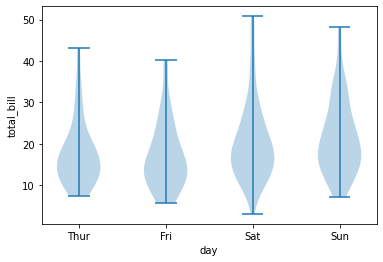

In [6]:
# matplotlibでヴァイオリンプロット描画
x1 = tips[tips['day'] == 'Thur']['total_bill'].values.tolist()
x2 = tips[tips['day'] == 'Fri']['total_bill'].values.tolist()
x3 = tips[tips['day'] == 'Sat']['total_bill'].values.tolist()
x4 = tips[tips['day'] == 'Sun']['total_bill'].values.tolist()

fig = plt.figure()
ax = fig.add_subplot()
ax.violinplot([x1, x2 ,x3 ,x4])
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['Thur', 'Fri', 'Sat', 'Sun'])
ax.set_xlabel('day')
ax.set_ylabel('total_bill')
plt.show()

seaborn

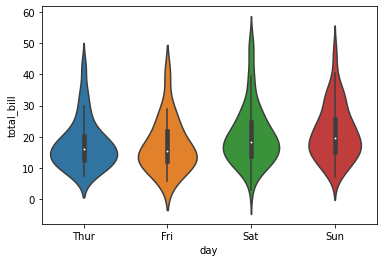

In [7]:
# seabornjでヴァイオリンプロットを描画
sns.violinplot(x='day', y='total_bill', data=tips)
plt.show()

## 描画
---
+ 棒グラフを描く
+ ヒストグラムを描く
+ 箱ひげ図を描く
+ 棒グラフで平均値を可視化する
+ scatter plotを描く
+ ヴァイオリンプロットを描く
+ 散布図を描く
+ 散布図行列を描く

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


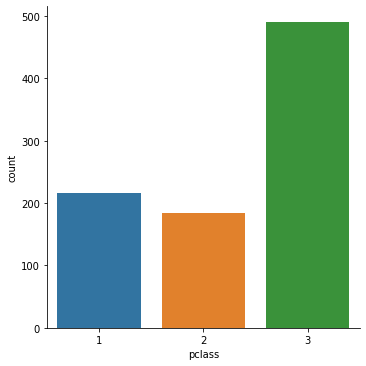

In [10]:
# 棒グラフ
sns.catplot(x='pclass', data=df, kind='count')

/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


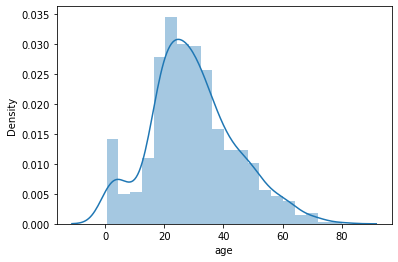

In [12]:
# ヒストグラム
sns.distplot(df['age']) # kde=False :カーネル密度曲線オフ
plt.show()

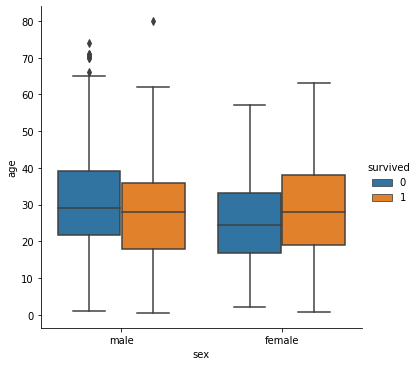

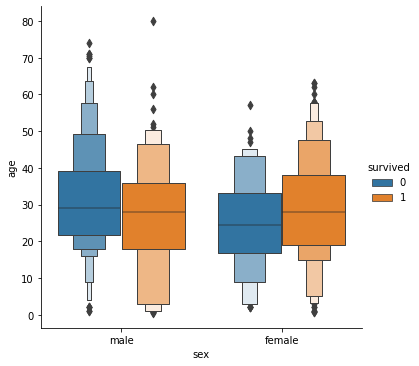

In [14]:
# 箱ヒゲ
sns.catplot(x='sex', y='age', data=df, kind='box', hue='survived')
sns.catplot(x='sex', y='age', data=df, kind='boxen', hue='survived') # boxen:より詳細に見れる

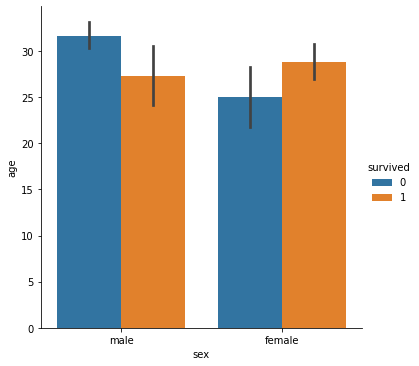

In [15]:
# 棒グラフで平均値可視化
sns.catplot(x='sex', y='age', data=df, kind='bar', hue='survived')

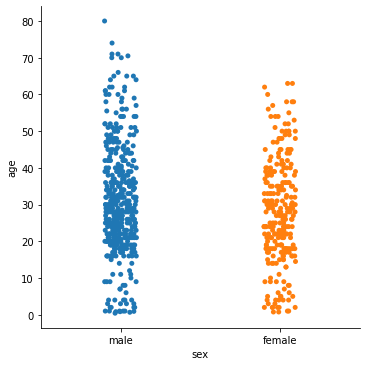

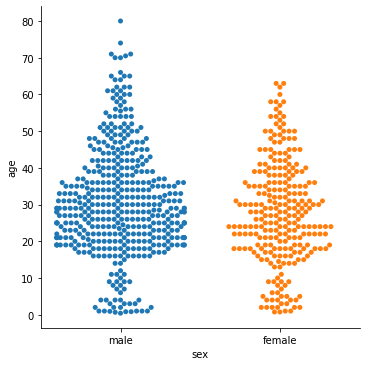

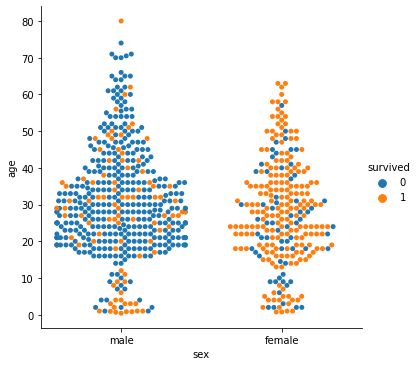

In [18]:
# scatter plot
sns.catplot(x='sex', y='age', data=df)
sns.catplot(x='sex', y='age', data=df, kind='swarm') # kind:データ分散（見易く）
sns.catplot(x='sex', y='age', data=df, kind='swarm', hue='survived')

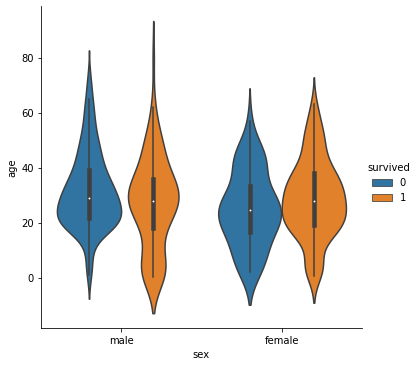

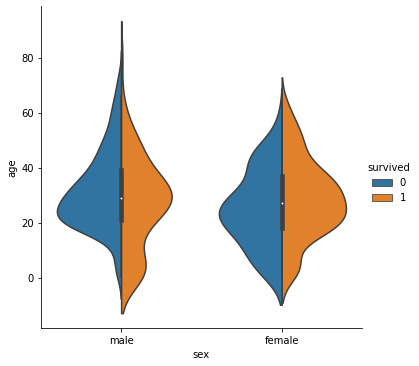

In [20]:
# ヴァイオリンプロットを描く
sns.catplot(x='sex', y='age', data=df, kind='violin', hue='survived')
sns.catplot(x='sex', y='age', data=df, kind='violin', hue='survived', split=True)

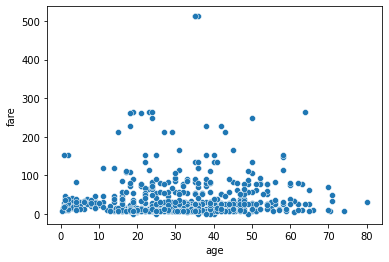

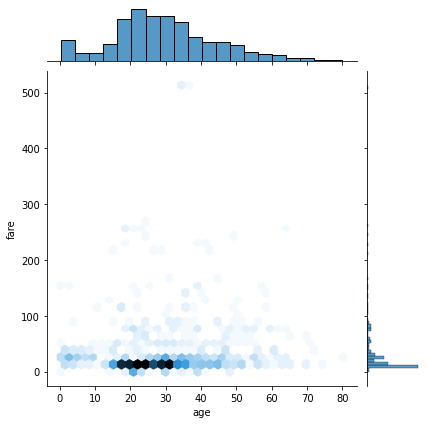

In [22]:
# 散布図
sns.scatterplot(x='age', y='fare', data=df)
sns.jointplot(x='age', y='fare', data=df, kind='hex') # ヒスト＋散布　hex：データの密度を濃淡表現

In [23]:
# 散布図行列を描画
df2 = sns.load_dataset('iris')
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


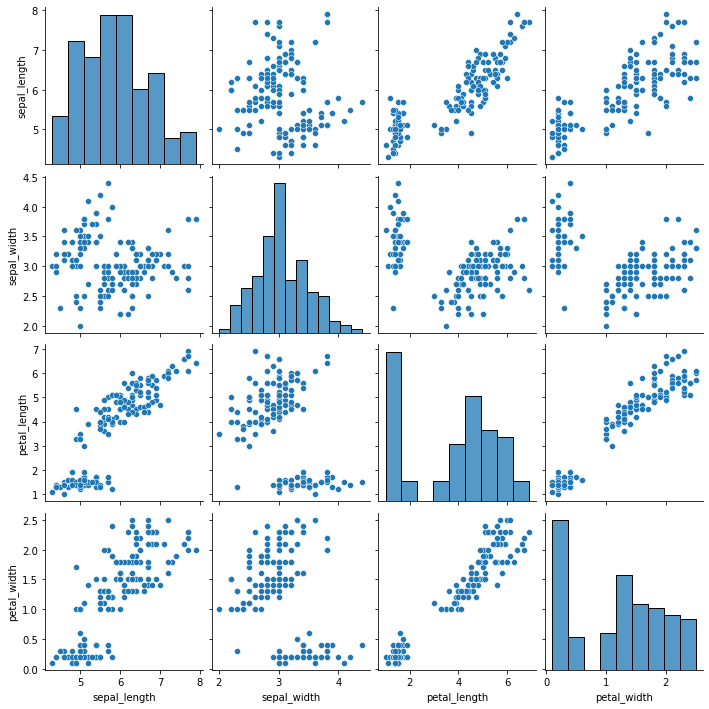

In [24]:
sns.pairplot(df2)

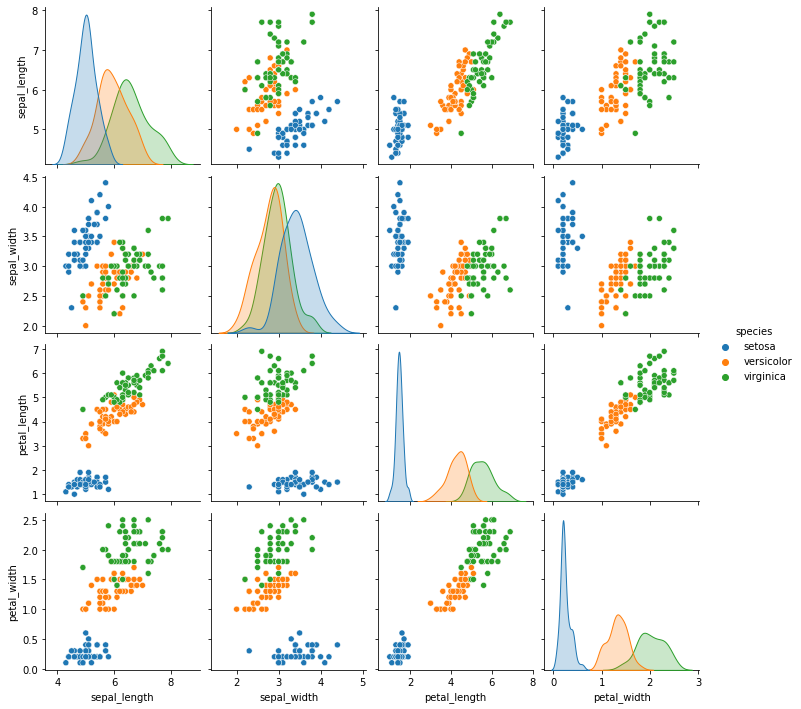

In [25]:
sns.pairplot(data=df2, hue='species')